LOADING /media/joel/JB_EXHDD/J1809-1943/PX500/38907/PX500_38907_psrflux_704-4032.ds...
...LOADED in 3.5 seconds

	 OBSERVATION PROPERTIES

filename:			PX500_38907_psrflux_704-4032.ds
MJD:				58530.77506311668
Centre frequency (MHz):		2368.0
Bandwidth (MHz):		3328.0
Channel bandwidth (MHz):	1.0
Integration time (s):		3924
Subintegration time (s):	6


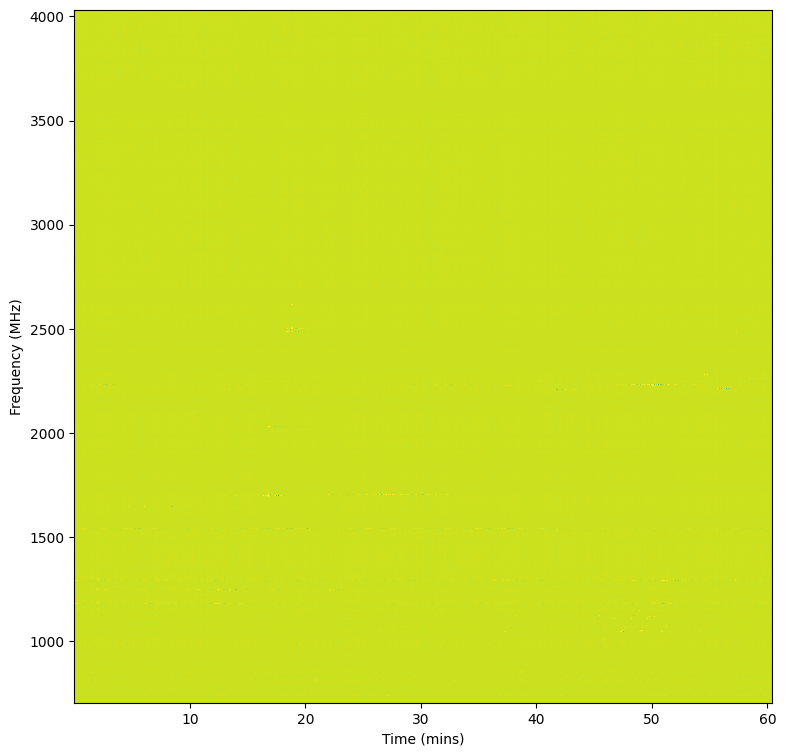

In [1]:
import numpy as np
import psrchive
import dynspectools as dtools

import glob
import astropy.units as u
from astropy.time import Time

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline


from scintools.dynspec import Dynspec  # The dynamic spectrum class
#dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/P970/P970_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing
#dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/38329/PX500_38329_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing
dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/38907/PX500_38907_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing
#dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/39167/PX500_39167_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing


dyn.plot_dyn() # plot the dynamic spectrum


LOADING /media/joel/JB_EXHDD/J1809-1943/P970/P970_psrflux_704-4032.ds...
...LOADED in 0.43 seconds

	 OBSERVATION PROPERTIES

filename:			P970_psrflux_704-4032.ds
MJD:				58463.948862029014
Centre frequency (MHz):		2368.0
Bandwidth (MHz):		3328.0
Channel bandwidth (MHz):	1.0
Integration time (s):		894
Subintegration time (s):	6


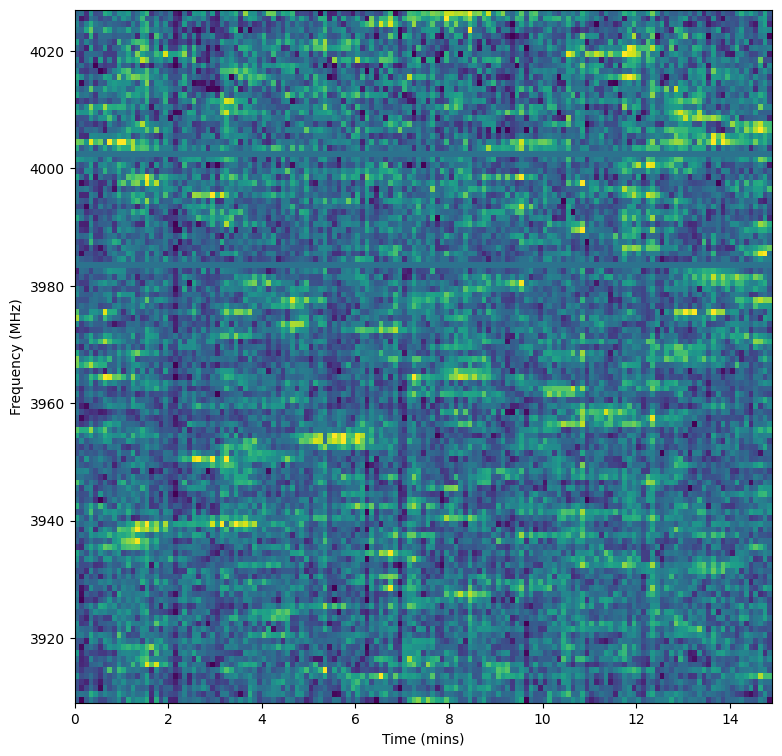

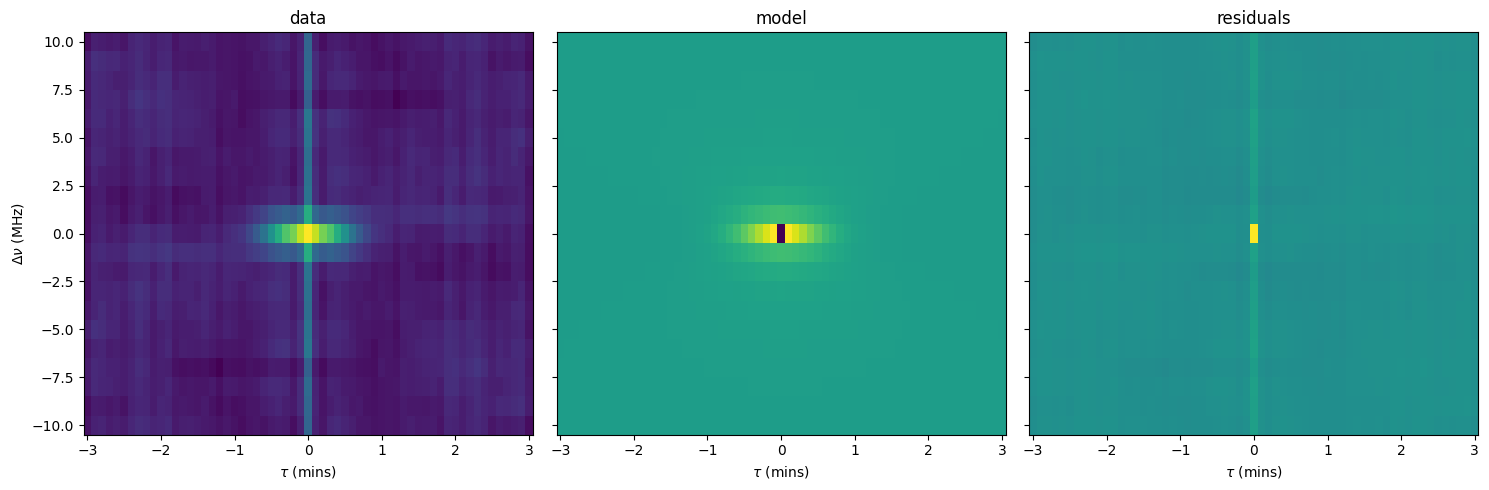

In [11]:
import dynspectools as dtools
from scintools.dynspec import Dynspec  # The dynamic spectrum class


dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/P970/P970_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing
#dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/38329/PX500_38329_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing
#dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/38907/PX500_38907_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing
#dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/39167/PX500_39167_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing
#dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/39295/PX500_39295_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing

f = (3904,4032)
#f = (3776,3904)
#f = (3660,3760)
#f = (3300,3375)
#f = (3150,3250)
#f = (2760,2860)
#f = (2501,2531)


dyn.crop_dyn(fmin=f[0], fmax=f[1]) # crop out a clean part of the band
dyn.zap()

dyn.trim_edges() # remove any zeros from the edges
dyn.refill(method='mean') # refill any gaps with the mean

dyn.plot_dyn(dpi=300) # plot the dynamic spectrum


dyn.get_scint_params(method='acf2d', plot=True) # measure the scintillation parameters

LOADING /media/joel/JB_EXHDD/J1809-1943/P970/P970_psrflux_v3.ds...
...LOADED in 0.41 seconds

	 OBSERVATION PROPERTIES

filename:			P970_psrflux_v3.ds
MJD:				58463.948862029014
Centre frequency (MHz):		2368.0
Bandwidth (MHz):		3328.0
Channel bandwidth (MHz):	1.0
Integration time (s):		894
Subintegration time (s):	6


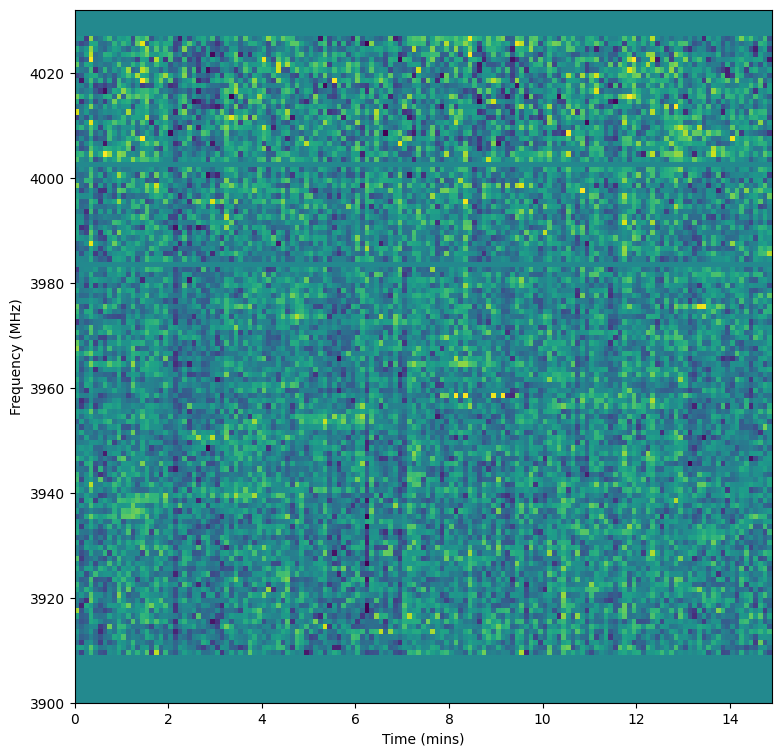

In [13]:
dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/P970/P970_psrflux_v3.ds') 

dyn.crop_dyn(fmin=3900, fmax=4032) # crop out a clean part of the band
dyn.refill(method='mean') # refill any gaps with the mean
dyn.plot_dyn()

dyn.get_scint_params(method='acf2d_approx', plot=False) # measure the scintillation parameters


LOADING /media/joel/JB_EXHDD/J1809-1943/PX500/38329/PX500_38329_psrflux_704-4032.ds...
...LOADED in 1.15 seconds

	 OBSERVATION PROPERTIES

filename:			PX500_38329_psrflux_704-4032.ds
MJD:				58469.17331642893
Centre frequency (MHz):		2368.0
Bandwidth (MHz):		3328.0
Channel bandwidth (MHz):	1.0
Integration time (s):		1332
Subintegration time (s):	6


/usr/local/lib/python3.10/dist-packages/scintools-0.2-py3.10.egg/scintools/dynspec.py:2346: RuntimeWarning: divide by zero encountered in divide
  errors_2d = 1/np.sqrt(N2d)


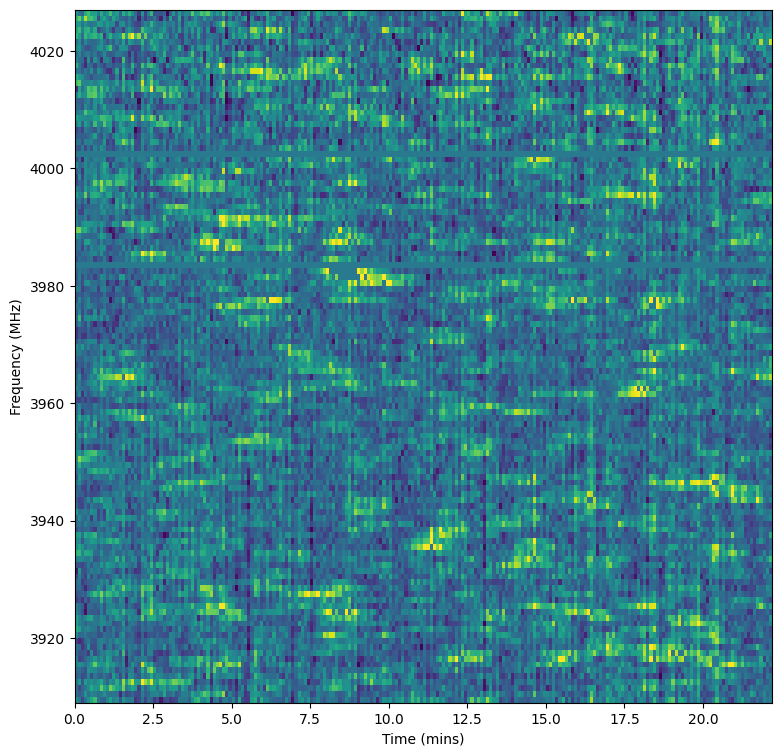

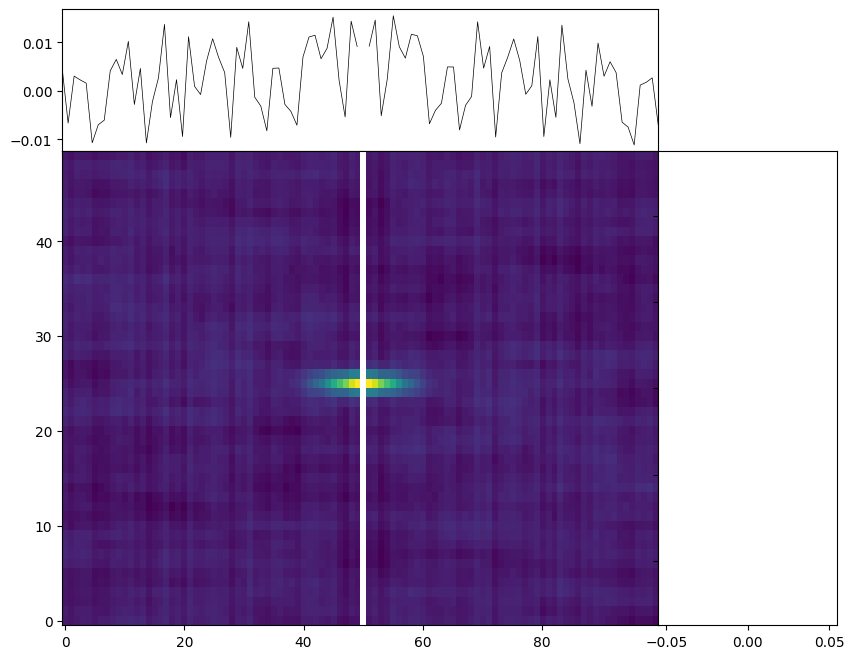

In [1]:
import numpy as np
import psrchive
import dynspectools as dtools

import glob
import astropy.units as u
from astropy.time import Time

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline
from matplotlib import gridspec

from scintools.dynspec import Dynspec  # The dynamic spectrum class


#dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/P970/P970_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing
dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/38329/PX500_38329_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing
#dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/38907/PX500_38907_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing
#dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/39167/PX500_39167_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing
#dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/39295/PX500_39295_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing


f = (3904,4032)
#f = (3660,3760)
#f = (3300,3375)
#f = (3150,3250)
#f = (2760,2860)
#f = (2501,2531)


dyn.crop_dyn(fmin=f[0], fmax=f[1]) # crop out a clean part of the band
dyn.zap()

dyn.trim_edges() # remove any zeros from the edges
dyn.refill(method='mean') # refill any gaps with the mean
dyn.get_scint_params(method='acf2d_approx', plot=False) # measure the scintillation parameters
dyn.plot_dyn()

acf = dyn.acf
tmax = np.argmax(np.mean(acf, axis=1))
fmax = np.argmax(np.mean(acf, axis=0))
acf = acf[tmax-25:tmax+25,fmax-50:fmax+50]

acf[:,np.argmax(np.mean(acf,axis=0))] = np.nan



fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2, height_ratios=[0.3,1], width_ratios=[1,0.3], hspace=0, wspace=0)


ax00 = fig.add_subplot(gs[0,0])
#mask = np.mean(acf, axis=0)<0.02
ax00.plot(np.mean(acf, axis=0), color='k', linewidth=0.5)
#for j in range(2):
#	ax00.axvline(x=W[i][j], color='r', linestyle='--', linewidth=0.5)
#ax00.set_xticks(xticks_x[i])
ax00.set_xticklabels([])
#ax00.set_yticks([])
#ax00.set_yticklabels([])
ax00.margins(x=0)

ax10 = fig.add_subplot(gs[1,0])
ax10.imshow(acf, cmap="viridis", 
		  #vmin=vmin[i], 
		  #vmax=vmax[i], 
		  aspect='auto', origin='lower', interpolation='none')
#ax10.set_xticks(xticks_x[i])
#ax10.set_xticklabels(xticks[i], fontsize=fontsize)
#plt.yticks(yticks_y, yticks, fontsize=fontsize)

ax11 = fig.add_subplot(gs[1,1])
ax11.plot(np.mean(acf, axis=1), np.arange(np.shape(acf)[0]), color='k', linewidth=0.5)
#ax11.set_xticks([])
#ax11.set_xticklabels([])
#ax11.set_yticks(yticks_y)
ax11.set_yticklabels([])
ax11.margins(y=0)

plt.show()

#plt.imshow(dyn.acf, aspect='auto', origin='lower',vmin=0)

In [14]:
f = ([4032,3904], [3904,3776], [3776,3648], [3648,3520], [3520,3392], [3392,3264], [3264,3136], [3136,3008], [3008,2880], [2880,2752], [2752,2624], [2624,2496], [2496,2368], [2368,2240], [2240,2112], [2112,1984])
from scintools.dynspec import Dynspec  # The dynamic spectrum class
import numpy as np
import polars as pl

data_P970 = []
data_PX500_38329 = []
data_PX500_38907 = []
data_PX500_39167 = []
data_PX500_39295 = []



for i in range(len(f)):
    dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/P970/P970_psrflux_704-4032.ds') 

    dyn.crop_dyn(fmin=f[i][1], fmax=f[i][0]) # crop out a clean part of the band
    dyn.refill(method='mean') # refill any gaps with the mean
    dyn.get_scint_params(method='acf2d_approx', plot=False, display=False, get_fit_report=False) # measure the scintillation parameters
    dyn.plot_dyn(filename='/home/joel/OneDrive/Astro/J1809-1943/Figures/DS_P970_'+str(f[i][0])+'-'+str(f[i][1])+'.pdf', display=False)

    #a = ([dyn.freq, np.round(np.max(np.mean(dyn.acf, axis=0)), 2), np.round(np.max(np.mean(dyn.acf, axis=1)), 2), np.round(dyn.dnu, 2), np.round(dyn.dnuerr, 2), np.round(dyn.tau, 2), np.round(dyn.tauerr, 2)])
    #data_P970.append(a)

for i in range(len(f)):
    dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/38329/PX500_38329_psrflux_704-4032.ds')

    dyn.crop_dyn(fmin=f[i][1], fmax=f[i][0]) # crop out a clean part of the band
    dyn.refill(method='mean') # refill any gaps with the mean
    dyn.get_scint_params(method='acf2d_approx', plot=False, display=False, get_fit_report=False) # measure the scintillation parameters
    dyn.plot_dyn(filename='/home/joel/OneDrive/Astro/J1809-1943/Figures/DS_PX500_38329_'+str(f[i][0])+'-'+str(f[i][1])+'.pdf', display=False)

    #a = ([dyn.freq, np.round(np.max(np.mean(dyn.acf, axis=0)), 2), np.round(np.max(np.mean(dyn.acf, axis=1)), 2), np.round(dyn.dnu, 2), np.round(dyn.dnuerr, 2), np.round(dyn.tau, 2), np.round(dyn.tauerr, 2)])
    #data_PX500_38329.append(a)

#for i in range(len(f)):
#    dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/38907/PX500_38907_psrflux_704-4032.ds')
#
#    dyn.crop_dyn(fmin=f[i][1], fmax=f[i][0]) # crop out a clean part of the band
#    dyn.refill(method='mean') # refill any gaps with the mean
#    dyn.get_scint_params(method='acf2d_approx', plot=False, display=False, get_fit_report=False) # measure the scintillation parameters
#
#    a = ([dyn.freq, np.round(np.max(np.mean(dyn.acf, axis=0)), 2), np.round(np.max(np.mean(dyn.acf, axis=1)), 2), np.round(dyn.dnu, 2), np.round(dyn.dnuerr, 2), np.round(dyn.tau, 2), np.round(dyn.tauerr, 2)])
#    data_PX500_38907.append(a)
#
#for i in range(len(f)):
#    dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/39167/PX500_39167_psrflux_704-4032.ds')
#
#    dyn.crop_dyn(fmin=f[i][1], fmax=f[i][0]) # crop out a clean part of the band
#    dyn.refill(method='mean') # refill any gaps with the mean
#    dyn.get_scint_params(method='acf2d_approx', plot=False, display=False, get_fit_report=False) # measure the scintillation parameters
#
#    a = ([dyn.freq, np.round(np.max(np.mean(dyn.acf, axis=0)), 2), np.round(np.max(np.mean(dyn.acf, axis=1)), 2), np.round(dyn.dnu, 2), np.round(dyn.dnuerr, 2), np.round(dyn.tau, 2), np.round(dyn.tauerr, 2)])
#    data_PX500_39167.append(a)
#
#for i in range(len(f)):
#    dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/39295/PX500_39295_psrflux_704-4032.ds')
#
#    dyn.crop_dyn(fmin=f[i][1], fmax=f[i][0]) # crop out a clean part of the band
#    dyn.refill(method='mean') # refill any gaps with the mean
#    dyn.get_scint_params(method='acf2d_approx', plot=False, display=False, get_fit_report=False) # measure the scintillation parameters
#
#    a = ([dyn.freq, np.round(np.max(np.mean(dyn.acf, axis=0)), 2), np.round(np.max(np.mean(dyn.acf, axis=1)), 2), np.round(dyn.dnu, 2), np.round(dyn.dnuerr, 2), np.round(dyn.tau, 2), np.round(dyn.tauerr, 2)])
#    data_PX500_39295.append(a)

LOADING /media/joel/JB_EXHDD/J1809-1943/P970/P970_psrflux_704-4032.ds...
...LOADED in 0.4 seconds

	 OBSERVATION PROPERTIES

filename:			P970_psrflux_704-4032.ds
MJD:				58463.948862029014
Centre frequency (MHz):		2368.0
Bandwidth (MHz):		3328.0
Channel bandwidth (MHz):	1.0
Integration time (s):		894
Subintegration time (s):	6
LOADING /media/joel/JB_EXHDD/J1809-1943/P970/P970_psrflux_704-4032.ds...
...LOADED in 0.38 seconds

	 OBSERVATION PROPERTIES

filename:			P970_psrflux_704-4032.ds
MJD:				58463.948862029014
Centre frequency (MHz):		2368.0
Bandwidth (MHz):		3328.0
Channel bandwidth (MHz):	1.0
Integration time (s):		894
Subintegration time (s):	6
LOADING /media/joel/JB_EXHDD/J1809-1943/P970/P970_psrflux_704-4032.ds...
...LOADED in 0.4 seconds

	 OBSERVATION PROPERTIES

filename:			P970_psrflux_704-4032.ds
MJD:				58463.948862029014
Centre frequency (MHz):		2368.0
Bandwidth (MHz):		3328.0
Channel bandwidth (MHz):	1.0
Integration time (s):		894
Subintegration time (s):	6
LOADING /med

In [8]:
df_P970 = pl.DataFrame(data_P970, schema=["freq", "x_max", "y_max", "dnu", "dnuerr", "tau", "tauerr"])
df_PX500_38329 = pl.DataFrame(data_PX500_38329, schema=["freq", "x_max", "y_max", "dnu", "dnuerr", "tau", "tauerr"])
df_PX500_38907 = pl.DataFrame(data_PX500_38907, schema=["freq", "x_max", "y_max", "dnu", "dnuerr", "tau", "tauerr"])
df_PX500_39167 = pl.DataFrame(data_PX500_39167, schema=["freq", "x_max", "y_max", "dnu", "dnuerr", "tau", "tauerr"])
df_PX500_39295 = pl.DataFrame(data_PX500_39295, schema=["freq", "x_max", "y_max", "dnu", "dnuerr", "tau", "tauerr"])


print(df_P970, df_PX500_38329, df_PX500_38907, df_PX500_39167, df_PX500_39295)

/usr/lib/python3.10/functools.py:889: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  return dispatch(args[0].__class__)(*args, **kw)


shape: (16, 7)
┌────────┬───────┬───────┬───────────┬────────┬───────┬────────┐
│ freq   ┆ x_max ┆ y_max ┆ dnu       ┆ dnuerr ┆ tau   ┆ tauerr │
│ ---    ┆ ---   ┆ ---   ┆ ---       ┆ ---    ┆ ---   ┆ ---    │
│ f64    ┆ f64   ┆ f64   ┆ f64       ┆ f64    ┆ f64   ┆ f64    │
╞════════╪═══════╪═══════╪═══════════╪════════╪═══════╪════════╡
│ 3968.0 ┆ 0.06  ┆ 0.02  ┆ 0.59      ┆ 0.02   ┆ 33.27 ┆ 1.07   │
│ 3840.0 ┆ 0.06  ┆ 0.02  ┆ 0.6       ┆ 0.02   ┆ 35.47 ┆ 1.08   │
│ 3712.0 ┆ 0.05  ┆ 0.02  ┆ 0.56      ┆ 0.02   ┆ 31.66 ┆ 0.92   │
│ 3584.0 ┆ 0.02  ┆ 0.01  ┆ 0.46      ┆ 0.01   ┆ 33.39 ┆ 0.87   │
│ 3456.0 ┆ 0.04  ┆ 0.02  ┆ 0.41      ┆ 0.01   ┆ 33.6  ┆ 0.82   │
│ …      ┆ …     ┆ …     ┆ …         ┆ …      ┆ …     ┆ …      │
│ 2560.0 ┆ 0.06  ┆ 0.02  ┆ 0.3       ┆ 0.02   ┆ 30.03 ┆ 1.04   │
│ 2432.0 ┆ 0.02  ┆ 0.02  ┆ 0.25      ┆ 0.02   ┆ 25.16 ┆ 1.78   │
│ 2304.0 ┆ 0.04  ┆ 0.01  ┆ 22.89     ┆ 1.17   ┆ 4.26  ┆ 0.19   │
│ 2176.0 ┆ 0.08  ┆ 0.01  ┆ 50.3      ┆ 3.0    ┆ 4.3   ┆ 0.23   │
│ 2048.0 ┆

In [35]:
#f = ([3648,3712],[3712,3776],[3776,3840],[3840,3904],[3904,3968],[3968,4032])
#f = ([3808,3840],[3840,3872],[3872,3904],[3904,3936],[3936,3968],[3968,4000],[4000,4032])
#f = ([3920,3936],[3936,3952],[3952,3968],[3968,3984],[3984,4000],[4000,4016])
f = []
start = 3920-16*5
end = 4016
step = 16

while start < end:
    f.append([start, start + step])
    start += step
print(f)

f = ([3920, 3936], [3936, 3952], [3952, 3968], [3968, 3984], [3984, 4000], [4000, 4016], [4016, 4032])


#f = ([2501,2531],[2552,2619],[2760,2860],[3150,3250],[3300,3375],[3660,3760],[3910,4025])
#f = ([2760,2860],[3150,3250],[3300,3375],[3660,3760],[3910,4025])


data = []
for i in range(len(f)):
    dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/P970/P970_psrflux_704-4032.ds') 
    #dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/38329/PX500_38329_psrflux_704-4032.ds')
    #dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/38907/PX500_38907_psrflux_704-4032.ds')
    #dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/39167/PX500_39167_psrflux_704-4032.ds')

    dyn.crop_dyn(fmin=f[i][0], fmax=f[i][1]) # crop out a clean part of the band

    dyn.trim_edges() # remove any zeros from the edges
    dyn.refill(method='mean') # refill any gaps with the mean

    dyn.get_scint_params(method='acf2d_approx', plot=False) # measure the scintillation parameters

    a = ([dyn.freq, dyn.dnu, dyn.dnuerr, dyn.tau, dyn.tauerr])
    data.append(a)

[[3840, 3856], [3856, 3872], [3872, 3888], [3888, 3904], [3904, 3920], [3920, 3936], [3936, 3952], [3952, 3968], [3968, 3984], [3984, 4000], [4000, 4016]]
LOADING /media/joel/JB_EXHDD/J1809-1943/P970/P970_psrflux_704-4032.ds...
...LOADED in 0.45 seconds

	 OBSERVATION PROPERTIES

filename:			P970_psrflux_704-4032.ds
MJD:				58463.948862029014
Centre frequency (MHz):		2368.0
Bandwidth (MHz):		3328.0
Channel bandwidth (MHz):	1.0
Integration time (s):		894
Subintegration time (s):	6
LOADING /media/joel/JB_EXHDD/J1809-1943/P970/P970_psrflux_704-4032.ds...
...LOADED in 0.37 seconds

	 OBSERVATION PROPERTIES

filename:			P970_psrflux_704-4032.ds
MJD:				58463.948862029014
Centre frequency (MHz):		2368.0
Bandwidth (MHz):		3328.0
Channel bandwidth (MHz):	1.0
Integration time (s):		894
Subintegration time (s):	6
LOADING /media/joel/JB_EXHDD/J1809-1943/P970/P970_psrflux_704-4032.ds...
...LOADED in 0.39 seconds

	 OBSERVATION PROPERTIES

filename:			P970_psrflux_704-4032.ds
MJD:				58463.94886202

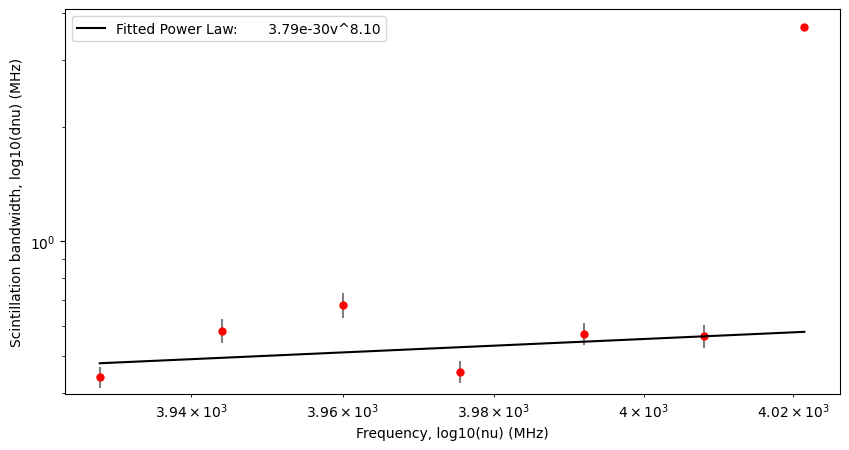

In [39]:
fig = plt.figure(figsize=(10,5))
x = [i[0] for i in data]
y = [i[1] for i in data]
y_err = [i[2] for i in data]
plt.errorbar(x, y, yerr=y_err, fmt='none', c='grey')
plt.plot(x, y, 'o', markersize=5, c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency, log10(nu) (MHz)')
plt.ylabel('Scintillation bandwidth, log10(dnu) (MHz)')


from scipy.optimize import curve_fit

def power_law(x, a, b):
    return a * np.power(x, b)

# Fit the power law to the data
popt, pcov = curve_fit(power_law, x, y, sigma=y_err, absolute_sigma=True, maxfev=10000)

# Extract the fitted parameters and their errors
a_fit, b_fit = popt
a_fit_error, b_fit_error = np.sqrt(np.diag(pcov))

# Define a range of exponents based on the error bounds
b_lower = b_fit - b_fit_error
b_upper = b_fit + b_fit_error

# Plot the data and the fitted power law
plt.plot(x, power_law(x, a_fit, b_fit), color='k', label='Fitted Power Law: {:14.2e}v^{:.2f}'.format(a_fit, b_fit))
#plt.fill_between(x, power_law(x, a_fit - a_fit_error, b_fit - b_fit_error), power_law(x, a_fit + a_fit_error, b_fit + b_fit_error), color='red', alpha=0.2)

# Plot additional power law curves based on error bounds
#plt.plot(x, power_law(x, a_fit, b_lower), color='gray', linestyle='--', label='Possible Exponents: Upper %s, Lower %s'%(np.round(b_upper, 3), np.round(b_lower, 3)))
#plt.plot(x, power_law(x, a_fit, b_upper), color='gray', linestyle='--')


plt.legend()




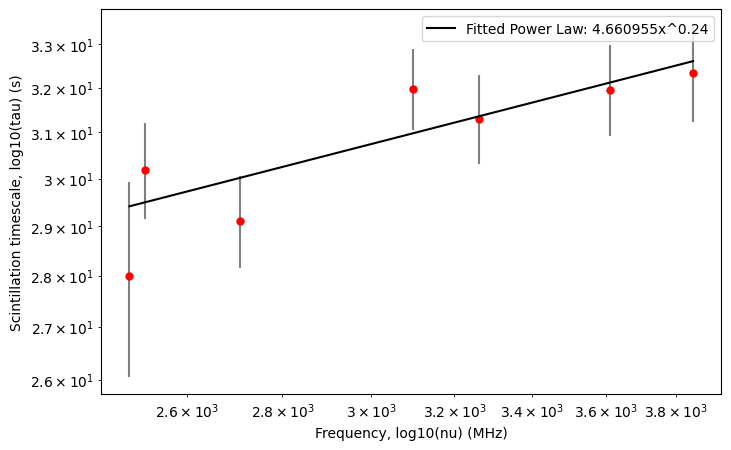

In [ ]:
fig = plt.figure(figsize=(8,5))
x = [i[0] for i in data]
y = [i[3] for i in data]
plt.errorbar(x, y, yerr=[i[4] for i in data], fmt='none', c='grey')
plt.plot(x, y, 'o', markersize=5, c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency, log10(nu) (MHz)')
plt.ylabel('Scintillation timescale, log10(tau) (s)')


from scipy.optimize import curve_fit

def power_law(x, a, b):
    return a * np.power(x, b)

popt, pcov = curve_fit(power_law, x, y, sigma=[i[4] for i in data], absolute_sigma=True)
a_fit, b_fit = popt

# Plot the data and the fitted power law
plt.plot(x, power_law(x, a_fit, b_fit), color='k', label='Fitted Power Law: {:.6f}x^{:.2f}'.format(a_fit, b_fit))
plt.legend()


